In [1]:
from tensorflow import keras
from keras.layers import (Conv2D, SeparableConv2D, DepthwiseConv2D, BatchNormalization, MaxPooling2D, SpatialDropout2D,
                          LocallyConnected2D, Dense, Flatten, Dropout, Add)

2022-12-26 11:43:50.829830: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-26 11:43:51.889755: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-26 11:43:51.889869: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-26 11:43:51.889876: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [5]:
# Build the model
activation = 'relu'
input_shape = (28, 28, 1)
kernel = 3
pool = 2
padding = 'valid'

dropout = 0.25

inputs = keras.Input(shape=input_shape)
batch_norm_input = BatchNormalization()(inputs)

# first branch
x = Conv2D(32, kernel_size=kernel, padding=padding, activation=activation)(batch_norm_input)
x = MaxPooling2D(2)(x)
x = SpatialDropout2D(dropout)(x)

x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=kernel, padding=padding, activation=activation)(x)
x = MaxPooling2D(2)(x)
x = SpatialDropout2D(dropout)(x)

x = BatchNormalization()(x)
x = Conv2D(128, kernel_size=kernel, padding=padding, activation=activation)(x)
x = MaxPooling2D(2)(x)
x = SpatialDropout2D(dropout)(x)
out_first = Flatten()(x)
print("out first", x.shape)

# second branch
# x = SeparableConv2D(32, kernel_size=kernel, padding=padding, activation=activation)(batch_norm_input)
# x = MaxPooling2D(2)(x)
# x = SpatialDropout2D(dropout)(x)
#
# x = BatchNormalization()(x)
# x = SeparableConv2D(64, kernel_size=kernel, padding=padding, activation=activation)(x)
# x = MaxPooling2D(2)(x)
# x = SpatialDropout2D(dropout)(x)
#
# x = BatchNormalization()(x)
# x = SeparableConv2D(128, kernel_size=kernel, padding=padding, activation=activation)(x)
# x = MaxPooling2D(2)(x)
# x = SpatialDropout2D(dropout)(x)
# out_second = Flatten()(x)
# print("out second", x.shape)

# third branch
x = LocallyConnected2D(32, kernel_size=kernel, activation=activation)(batch_norm_input)
x = MaxPooling2D(2)(x)
x = SpatialDropout2D(dropout)(x)

x = BatchNormalization()(x)
x = LocallyConnected2D(64, kernel_size=kernel, activation=activation)(x)
x = MaxPooling2D(2)(x)
x = SpatialDropout2D(dropout)(x)

x = BatchNormalization()(x)
x = LocallyConnected2D(128, kernel_size=kernel, activation=activation)(x)
x = MaxPooling2D(2)(x)
x = SpatialDropout2D(dropout)(x)
out_third = Flatten()(x)
print("out third", x.shape)

# fourth branch
x = Flatten()(batch_norm_input)
x = Dense(512, activation=activation)(x)
x = Dropout(dropout)(x)
x = BatchNormalization()(x)
x = Dense(256, activation=activation)(x)
x = Dropout(dropout)(x)
x = BatchNormalization()(x)
x = Dense(128, activation=activation)(x)
out_fourth = Dropout(dropout)(x)
print("out forth", x.shape)

y = Add()([out_first, out_third, out_fourth])
y = BatchNormalization()(y)
outputs = Dense(10, activation='softmax')(y)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

out first (None, 1, 1, 128)
out third (None, 1, 1, 128)
out forth (None, 128)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 batch_normalization_10 (BatchN  (None, 28, 28, 1)   4           ['input_2[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv2d_3 (Conv2D)              (None, 26, 26, 32)   320         ['batch_normalization_10[0][0]'] 
                                                                                                  
 locally_conne

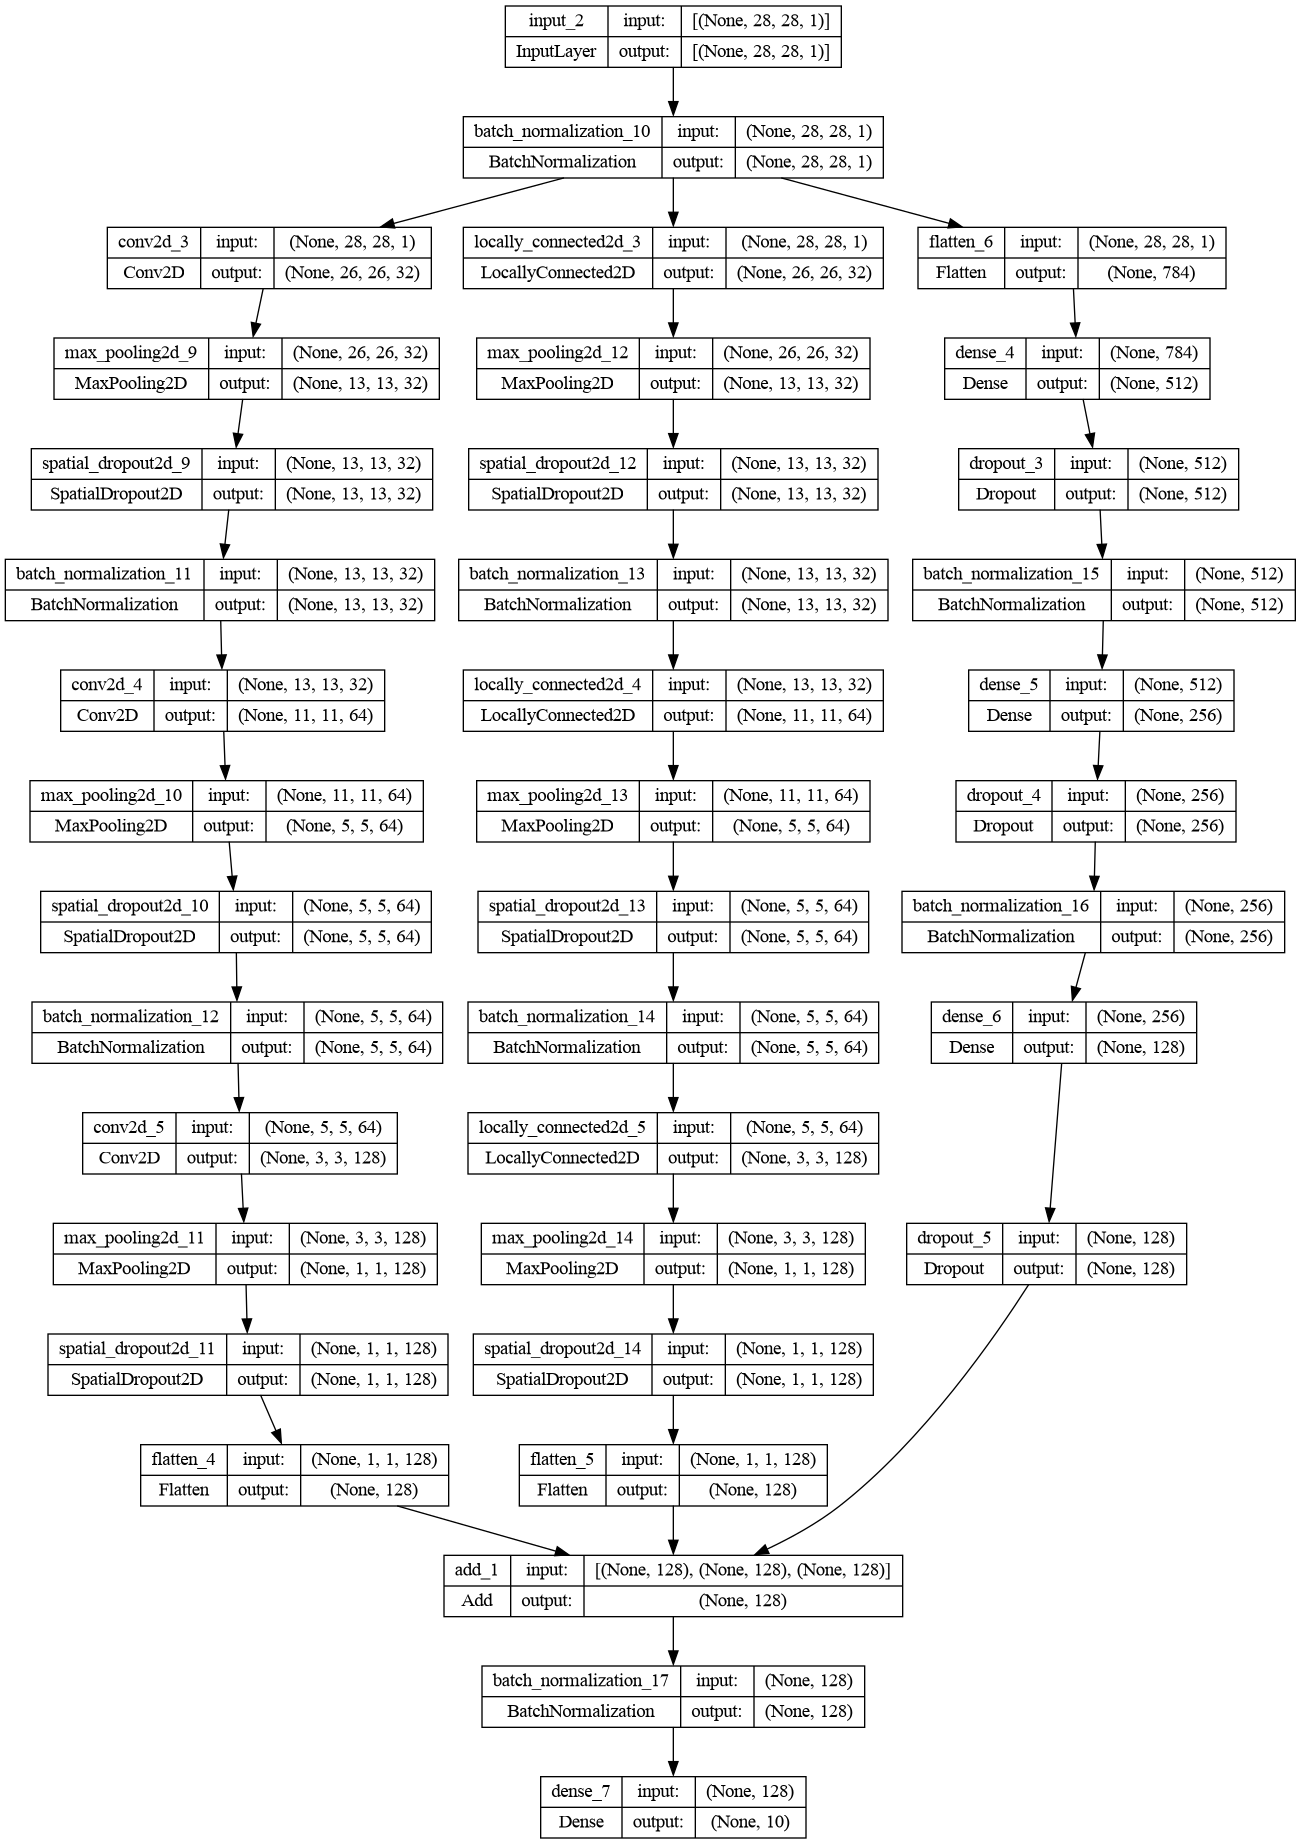

In [6]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

In [7]:
model.save("model.h5")

In [4]:
import json

print(json.dumps(model.get_config()))

{"name": "model", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 0.001, "center": true, "scale": true, "beta_initializer": {"class_name": "Zeros", "config": {}}, "gamma_initializer": {"class_name": "Ones", "config": {}}, "moving_mean_initializer": {"class_name": "Zeros", "config": {}}, "moving_variance_initializer": {"class_name": "Ones", "config": {}}, "beta_regularizer": null, "gamma_regularizer": null, "beta_constraint": null, "gamma_constraint": null}, "name": "batch_normalization", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1

In [5]:
model.get_layer('conv2d').trainable_weights[1]

<tf.Variable 'conv2d/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [18]:
model.get_layer('dense_3')

In [17]:
model.get_layer('dense_3').inbound_nodes[0].inbound_layers

In [23]:
for l in model.layers:
    layer_name = l.name
    print(f"layer: {layer_name}", end=" ")
    for node in l.outbound_nodes:
        print(node.outbound_layer.name, )

layer: input_1 batch_normalization
layer: batch_normalization conv2d
separable_conv2d
locally_connected2d
flatten_3
layer: conv2d max_pooling2d
layer: separable_conv2d max_pooling2d_3
layer: locally_connected2d max_pooling2d_6
layer: max_pooling2d spatial_dropout2d
layer: max_pooling2d_3 spatial_dropout2d_3
layer: max_pooling2d_6 spatial_dropout2d_6
layer: spatial_dropout2d conv2d_1
layer: spatial_dropout2d_3 separable_conv2d_1
layer: spatial_dropout2d_6 locally_connected2d_1
layer: conv2d_1 max_pooling2d_1
layer: separable_conv2d_1 max_pooling2d_4
layer: locally_connected2d_1 max_pooling2d_7
layer: flatten_3 dense
layer: max_pooling2d_1 spatial_dropout2d_1
layer: max_pooling2d_4 spatial_dropout2d_4
layer: max_pooling2d_7 spatial_dropout2d_7
layer: dense dropout
layer: spatial_dropout2d_1 conv2d_2
layer: spatial_dropout2d_4 separable_conv2d_2
layer: spatial_dropout2d_7 locally_connected2d_2
layer: dropout dense_1
layer: conv2d_2 max_pooling2d_2
layer: separable_conv2d_2 max_pooling2d_5